In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

def cartesian_ax(xmin,xmax,ymin,ymax,ticks_frequency = 1):
    # Function to plot Cartesian axes and grid
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')
    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_xlabel('$x$', size=14, labelpad=-24, x=1.02)
    ax.set_ylabel('$y$', size=14, labelpad=-21, y=1.02, rotation=0)
    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)
    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
    plt.text(0.49, 0.49, r"$O$", ha='right', va='top',
    transform=ax.transAxes,horizontalalignment='center', fontsize=14)
    
class complex:

    # Defining your object: complex number made of real and 
    # imaginary part
    def __init__(self,re,im):
        self.re = re
        self.im = im
    
    def __repr__(self):
        return str((self.re,self.im))
    
    def __str__(self):
        return str( (self.re,self.im) ) + " is the complex number " + str(self.re) + " +" + str(self.im) + "i"
    
    # Function working on complex number. Transform to 
    # polar coordinates. Output modulus and phase in tuple
    def polar(self):
        if self.re > 1e-16:
            theta = np.arctan(self.im/self.re)
        else:
            theta = self.im/abs(self.im)*np.pi/2
        rho = np.sqrt(self.re**2 + self.im**2)
        return (rho,theta)
    
    # Get phase of real number
    def phase(self): 
        phase = self.polar()[1]
        return phase
    
    # Get modulus of real number
    def modulus(self): return np.sqrt(self.re**2 + self.im**2)
        
    # Sum complex numbers
    def get_sum(self,y):
        return complex(self.re + y.re, self.im+y.im)
        
    # Define operator for sum of complex numbers (overload operator)
    def __add__(self,y):
        return complex(self.re + y.re, self.im + y.im)
        
    # nth-root
    def root(self,n):
        n = int(n)
        (r,p) = self.polar()
        s = r**(1./float(n))
        #print(s)
        phases = p/float(n) + (2.*np.pi/float(n))*np.arange(n)
        #print(phases)
        roots = [ ]
        for phase in phases:
            roots.append(complex(s*np.cos(phase),s*np.sin(phase)))
        return roots
    
    # Square root
    def sqrt(self):
        sq = self.root(2)
        return sq
    
    # Diplaying complex number as a point in the plane
    def display(self,lab=None,col="red"):
        plt.scatter(self.re,self.im,color=str(col),label=str(lab))

#####   Exercise: add multiplication, division, powers, exp and trignometric functions to the class complex. Write a function to pass from polar to x+iy form.

In [16]:
# Define complex number
x = 2.
y = np.pi
z = complex(x,y)
print(z.re)
print(z.im)

# Get polar representation
print(z.phase())
print(z.modulus())

2.0
3.141592653589793
1.0038848218538872
3.724191778237173


In [17]:
# Summing complex numbers
z1 = complex(1.,1.)
z2 = complex(2.,3.)
s = z1.get_sum(z2)
print(s.re)
print(s.im)

3.0
4.0


In [18]:
# Sum again, using + operator
s = z1 + z2
print(s.re)
print(s.im)

3.0
4.0


In [19]:
# Printing complex number, using __str__ and __repr__
print(repr(z1) )
print( str(z2) )

(1.0, 1.0)
(2.0, 3.0) is the complex number 2.0 +3.0i


In [20]:
# Finding square root
z1 = complex(1,1)
r = z1.root(2)
print([repr(el) for el in r])

['(1.0986841134678098, 0.45508986056222733)', '(-1.09868411346781, -0.4550898605622272)']


In [21]:
# Cubic root
z3 = complex(7.,25.)
r = z3.root(3)
print([repr(el) for el in r])

['(2.6882646753036052, 1.2413509701374705)', '(-2.4191738128033093, 1.7074300158405133)', '(-0.2690908625002957, -2.9487809859779825)']


In [22]:
r2 = z3.sqrt()
print([repr(el) for el in r2])

['(4.059649613667068, 3.0790834652128494)', '(-4.059649613667068, -3.079083465212849)']


[]

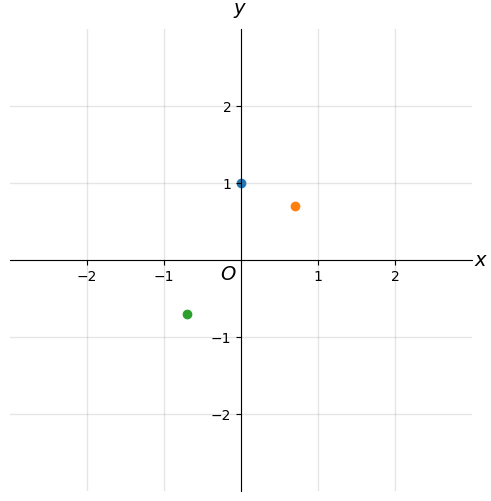

In [23]:
# Plotting roots of i
imag = complex(0,1)
irt = imag.sqrt()
#print([repr(el) for el in r])
cplane = cartesian_ax(-2,2,-2,2)
plt.scatter(imag.re,imag.im)
plt.scatter(irt[0].re,irt[0].im)
plt.scatter(irt[1].re,irt[1].im)
plt.plot()

[]

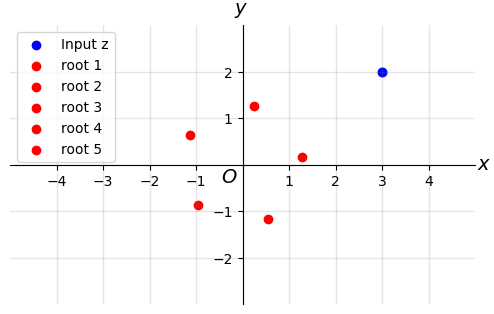

In [42]:
# Plotting roots of complex number
#=======================================
z3 = complex(3.,2.)
# Finding roots
zr = z3.root(5)
# Cartesian plane
cplane = cartesian_ax(-4,4,-2,2)
# Plotting input z3
plt.scatter(z3.re,z3.im)
z3.display("Input z","blue")
# plotting roots
i = 0
for z in zr:
    i += 1
    z.display("root " + str(i),"red")
plt.legend()
plt.plot()